In [2]:
import pandas as pd
from datetime import datetime, timedelta

def convert_to_utc(time_range, timezone_offset):
    """
    Convert a local time range to UTC
    timezone_offset is in hours (e.g., -5 for UTC-5)
    """
    # Define the time ranges in local time
    ranges = {
        'Morning': (7, 12), # 5h
        'Afternoon': (12, 17), # 5h
        'Evening': (17, 21), # 4h
        'Night': (21, 24)  # Using 24 for midnight, 3h
    }
    
    if time_range not in ranges:
        return None, None
        
    start_hour, end_hour = ranges[time_range]
    
    # Convert to UTC by applying offset
    utc_start = (start_hour - timezone_offset) % 24
    utc_end = (end_hour - timezone_offset) % 24
    
    return utc_start, utc_end

def parse_timezone(tz_str):
    """Extract timezone offset from string like 'UTC+3' or 'UTC-5'"""
    if not tz_str or tz_str == 'UTC':
        return 0
    
    try:
        return int(tz_str.replace('UTC', ''))
    except:
        return 0

def process_data(data_str):
    # Split the data into lines and process
    results = []
    
    for line in data_str.strip().split('\n'):
        if not line or line.startswith('|--'): continue  # Skip empty lines and separator
        
        # Remove leading/trailing |
        parts = [p.strip() for p in line.strip('|').split('|')]
        
        if len(parts) < 5 or parts[0] == 'What is your timezone?': continue
        
        timezone = parts[0].strip()
        tz_offset = parse_timezone(timezone)
        
        # Process each time slot
        time_slots = {
            'Morning': parts[1],
            'Afternoon': parts[2],
            'Evening': parts[3],
            'Night': parts[4]
        }
        
        for slot_name, days in time_slots.items():
            if days.strip():  # If there are any days listed
                utc_start, utc_end = convert_to_utc(slot_name, tz_offset)
                
                # Handle day shifting
                day_shift = ""
                if utc_start > utc_end:
                    day_shift = " (spans to next day)"
                elif utc_end == 24:
                    utc_end = 0
                    day_shift = " (spans to next day)"
                
                results.append({
                    'Original_Timezone': timezone,
                    'Time_Slot': slot_name,
                    'Days': days.strip(),
                    'UTC_Time': f"{utc_start:02d}:00-{utc_end:02d}:00{day_shift}"
                })
    
    return pd.DataFrame(results)

# Your provided data
data = """| What is your timezone? | What time seem ideal to you? (In your time zone!) [Morning (7-12h)] | What time seem ideal to you? (In your time zone!) [Afternoon (12-17h)] | What time seem ideal to you? (In your time zone!) [Evening (17-21h)] | What time seem ideal to you? (In your time zone!) [Night (21h+)] |
|------------------------|---------------------------------------------------------------------|------------------------------------------------------------------------|----------------------------------------------------------------------|------------------------------------------------------------------|
| UTC-5                  |                                                                     | Saturday, Sunday                                                       | Friday, Saturday, Sunday                                             | Monday, Thursday, Friday, Saturday, Sunday                       |
| UTC+3                  |                                                                     |                                                                        | Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday       | Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday   |
| UTC-8                  | Saturday, Sunday                                                    | Saturday, Sunday                                                       | Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday       |                                                                  |
| UTC                    |                                                                     | Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday         | Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday       |                                                                  |
| UTC-5                  |                                                                     |                                                                        |                                                                      |                                                                  |
| UTC+1                  |                                                                     |                                                                        |                                                                      | Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday   |
| UTC+1                  |                                                                     | Saturday, Sunday                                                       | Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday       |                                                                  |
| UTC+2                  |                                                                     | Thursday, Friday, Sunday                                               | Monday, Tuesday, Wednesday, Friday, Sunday                           |                                                                  |
| UTC+11                 | Saturday, Sunday                                                    | Saturday, Sunday                                                       | Saturday, Sunday                                                     |                                                                  |
| UTC-7                  |                                                                     |                                                                        |                                                                      | Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday   |
| UTC-1                  |                                                                     | Saturday, Sunday                                                       | Saturday, Sunday                                                     |                                                                  |"""

# Process and display results
df = process_data(data)

# Sort by timezone and time slot for better readability
df_sorted = df.sort_values(['Original_Timezone', 'Time_Slot'])
print("\nAvailability times converted to UTC:")
print(df_sorted.to_string(index=False))


Availability times converted to UTC:
Original_Timezone Time_Slot                                                           Days                        UTC_Time
              UTC Afternoon Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday                     12:00-17:00
              UTC   Evening Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday                     17:00-21:00
            UTC+1 Afternoon                                               Saturday, Sunday                     11:00-16:00
            UTC+1   Evening Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday                     16:00-20:00
            UTC+1     Night Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday                     20:00-23:00
           UTC+11 Afternoon                                               Saturday, Sunday                     01:00-06:00
           UTC+11   Evening                                               Saturday, Sunday           

C:\Users\USER\AppData\Local\Temp\ipykernel_20016\825642778.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df

,Original_Timezone,Time_Slot,Days,UTC_Time
0,UTC-5,Afternoon,"Saturday, Sunday",17:00-22:00
1,UTC-5,Evening,"Friday, Saturday, Sunday",22:00-02:00 (spans to next day)
2,UTC-5,Night,"Monday, Thursday, Friday, Saturday, Sunday",02:00-05:00
3,UTC+3,Evening,"Monday, Tuesday, Wednesday, Thursday, Friday, ...",14:00-18:00
4,UTC+3,Night,"Monday, Tuesday, Wednesday, Thursday, Friday, ...",18:00-21:00
5,UTC-8,Morning,"Saturday, Sunday",15:00-20:00
6,UTC-8,Afternoon,"Saturday, Sunday",20:00-01:00 (spans to next day)
7,UTC-8,Evening,"Monday, Tuesday, Wednesday, Thursday, Friday, ...",01:00-05:00
8,UTC,Afternoon,"Monday, Tuesday, Wednesday, Thursday, Friday, ...",12:00-17:00
9,UTC,Evening,"Monday, Tuesday, Wednesday, Thursday, Friday, ...",17:00-21:00



Top Meeting Time Slots (UTC):

Day      | Time  | People Available
---------|-------|------------------
Sunday   | 17:00 | 7 people
Sunday   | 18:00 | 7 people
Saturday | 20:00 | 7 people
Sunday   | 20:00 | 7 people
Sunday   | 15:00 | 6 people
Sunday   | 16:00 | 6 people
Saturday | 17:00 | 6 people
Saturday | 18:00 | 6 people
Saturday | 19:00 | 6 people
Sunday   | 19:00 | 6 people

Total number of respondents: 11
Maximum overlap (most people available at once): 7 people

Time slots with at least 6 people available:
- Sunday at 15:00 UTC
- Sunday at 16:00 UTC
- Saturday at 17:00 UTC
- Sunday at 17:00 UTC
- Saturday at 18:00 UTC
- Sunday at 18:00 UTC
- Saturday at 19:00 UTC
- Sunday at 19:00 UTC
- Saturday at 20:00 UTC
- Sunday at 20:00 UTC


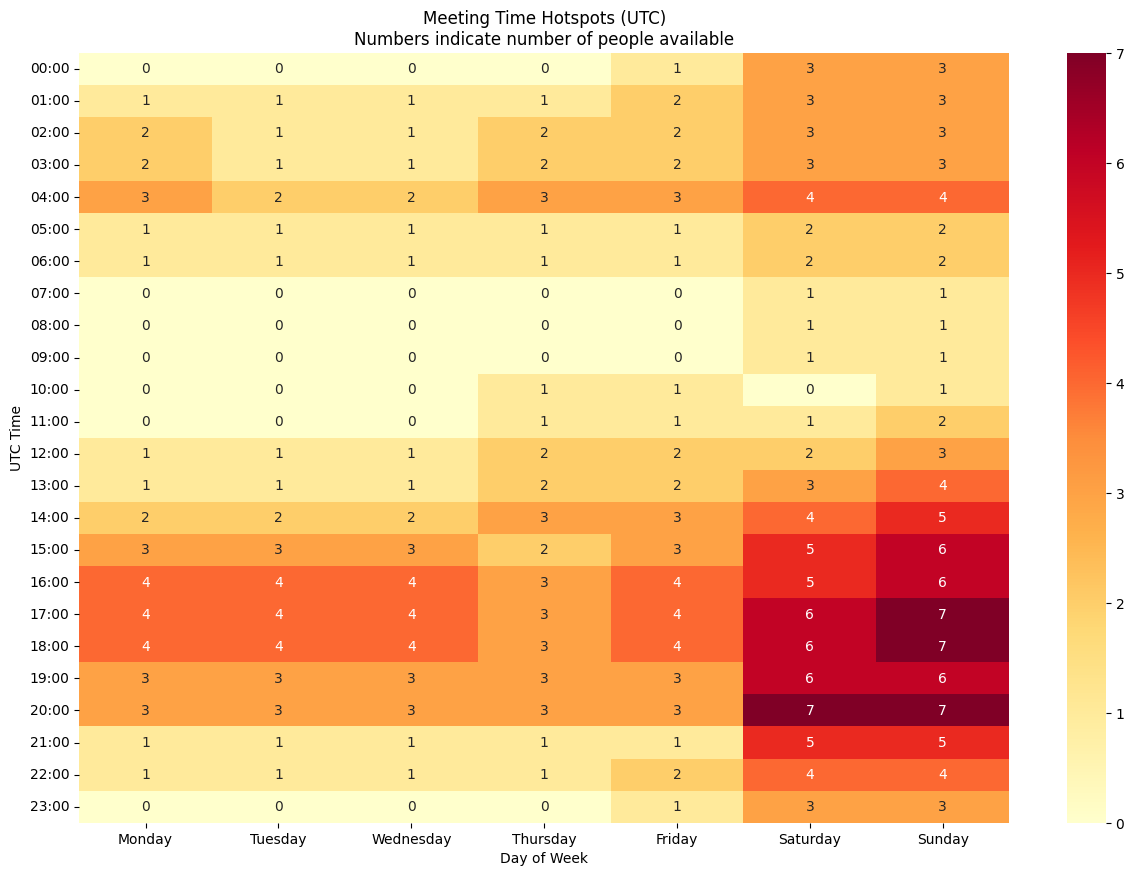

In [5]:
# First, let's create a more detailed hourly breakdown for each person's availability
import numpy as np

# Create a 24x7 grid for the week (24 hours x 7 days)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
availability_grid = np.zeros((24, 7))

# Helper function to parse the days string into a list
def parse_days(days_str):
    if not days_str:
        return []
    return [d.strip() for d in days_str.split(',')]

# Helper function to get hours range from UTC time string
def parse_utc_hours(utc_time):
    # Handle cases with day span notation
    time_part = utc_time.split('(')[0]
    start, end = time_part.split('-')
    start_hour = int(start.split(':')[0])
    end_hour = int(end.split(':')[0])
    return start_hour, end_hour

# Process each availability entry
for _, row in df.iterrows():
    days = parse_days(row['Days'])
    start_hour, end_hour = parse_utc_hours(row['UTC_Time'])
    
    # Handle time ranges that span midnight
    hours = []
    if start_hour > end_hour:
        hours = list(range(start_hour, 24)) + list(range(0, end_hour))
    else:
        hours = list(range(start_hour, end_hour))
    
    # Add to availability grid
    for day in days:
        day_idx = days_of_week.index(day)
        for hour in hours:
            availability_grid[hour, day_idx] += 1

# Create a heatmap using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(availability_grid, 
            xticklabels=days_of_week,
            yticklabels=[f"{i:02d}:00" for i in range(24)],
            cmap='YlOrRd',
            annot=True,
            fmt='g')

plt.title('Meeting Time Hotspots (UTC)\nNumbers indicate number of people available')
plt.xlabel('Day of Week')
plt.ylabel('UTC Time')

# Find the best meeting times
best_times = []
for hour in range(24):
    for day_idx, day in enumerate(days_of_week):
        count = availability_grid[hour, day_idx]
        if count > 0:  # Adjust this threshold as needed
            best_times.append({
                'day': day,
                'hour': f"{hour:02d}:00",
                'people_available': int(count)
            })

# Sort by number of people available
best_times.sort(key=lambda x: x['people_available'], reverse=True)

# Print the top meeting times
print("\nTop Meeting Time Slots (UTC):")
print("\nDay      | Time  | People Available")
print("---------|-------|------------------")
for slot in best_times[:10]:  # Show top 10 slots
    print(f"{slot['day']:<9}| {slot['hour']} | {slot['people_available']} people")

# Calculate some statistics
total_respondents = 11
print(f"\nTotal number of respondents: {total_respondents}")

max_availability = np.max(availability_grid)
print(f"Maximum overlap (most people available at once): {int(max_availability)} people")

# Find periods with at least 50% of respondents available
threshold = total_respondents / 2
good_slots = np.where(availability_grid >= threshold)
if len(good_slots[0]) > 0:
    print(f"\nTime slots with at least {threshold:.0f} people available:")
    for hour, day_idx in zip(*good_slots):
        print(f"- {days_of_week[day_idx]} at {hour:02d}:00 UTC")